Lets see a more advanced example


In this example the particular photograph we want to investigate is not contained in the scikit-learn library

Hence we want to use the Python Imaging Library (PIL) - or Pillow

Lets create a function that will implement the photograph in our jupiter notebook

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("lange_migrant_mother.jpg")

def show_image(img, h, w, size):
    plt.figure(figsize=(12, 10))
    plt.xticks(())
    plt.yticks(())
    plt.imshow(img,  cmap=plt.cm.gray)
    plt.title("height: %s width: %s size: %s" % (h, w, size))

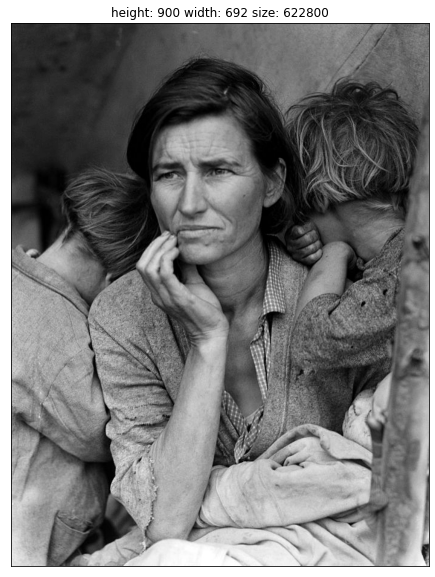

In [2]:
show_image(img, img.size[1], img.size[0], img.size[0] * img.size[1])

Lets think for a little - we have only seen examples with standard data (rows and columns) , but a photograph is also a collection of rows and columns



In [3]:
import numpy as np
print('Before reshaping:', img.size)
image_array = np.array(img.getdata(), np.uint8).reshape((img.size[1], img.size[0]))
print('After reshaping:', image_array.shape)

Before reshaping: (692, 900)
After reshaping: (900, 692)


In [4]:
# Using PCA to change the components to 50
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(image_array)

PCA(n_components=50)

In [7]:
# Now
pca.components_.shape

(50, 692)

In [6]:
pca.explained_variance_ratio_

array([0.47304963, 0.1281772 , 0.09398614, 0.05163205, 0.03208675,
       0.02249176, 0.01838176, 0.01489537, 0.01297648, 0.01056557,
       0.00931143, 0.00778975, 0.00703793, 0.00594134, 0.00562516,
       0.00547761, 0.00486829, 0.00431924, 0.00401961, 0.00366617,
       0.00330617, 0.00303809, 0.00289611, 0.00251274, 0.00239563,
       0.00222432, 0.00201078, 0.00197097, 0.00185998, 0.00182421,
       0.00169807, 0.0016067 , 0.00152938, 0.00150396, 0.00145237,
       0.00135394, 0.00120389, 0.00118387, 0.00117507, 0.00112609,
       0.00111496, 0.0010889 , 0.00103312, 0.00097103, 0.00091339,
       0.00091063, 0.00087783, 0.00086648, 0.00082656, 0.00080336])

To show the above data visually on a plot --> scree plot

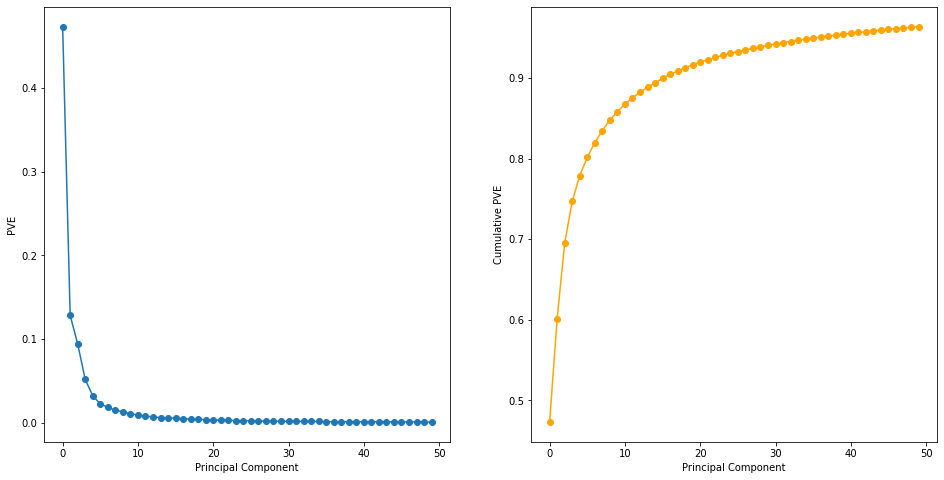

In [8]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('PVE')
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='orange')
plt.xlabel('Principal Component')
_ = plt.ylabel('Cumulative PVE')

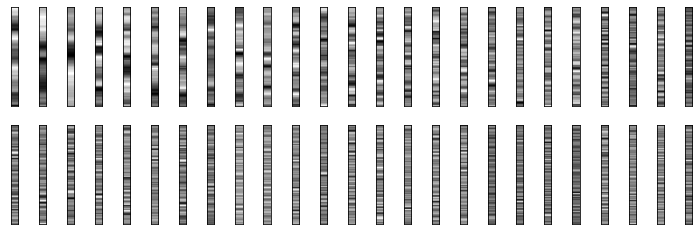

In [9]:
# We can also draw the above values

col_width = 50
plt.figure(figsize=(0.5 * 25, 2 * 2))
for component in range(pca.components_.shape[0]):
    plt.subplot(pca.components_.shape[0] // 25, 25, component + 1)
    comp_col = np.tile(pca.components_[component], col_width).reshape((col_width, -1)).T
    plt.imshow(comp_col, cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

We can display our first photograph in these 50 components

Hence the total number of data will be reduced from 900 rows and 692 columns to 900 rows and 50 columns

In [10]:
# Using the transform method
image_pca = pca.transform(image_array)
print(image_pca.shape)

(900, 50)


We can also do the reverse using inverse_transform()

Thus we can also go back to our original data dimensions

In [11]:
reduced_image = pca.inverse_transform(image_pca)

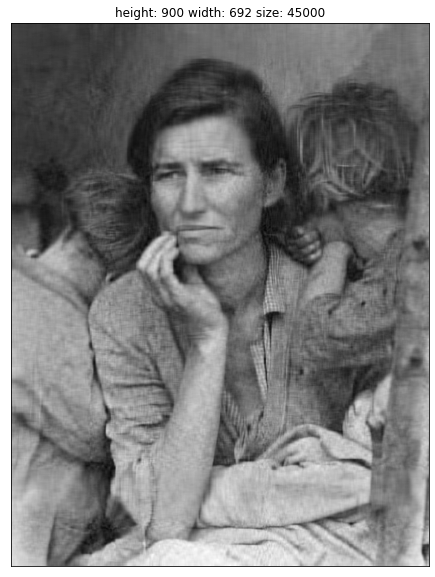

In [13]:
show_image(reduced_image, reduced_image.shape[0], reduced_image.shape[1], image_pca.size)

We can see from the above photograph that we have lost some of the data.

Thus we can also note that PCA also compresses the data and thus we have some lost of data.
But hence we can see in more detail the important details

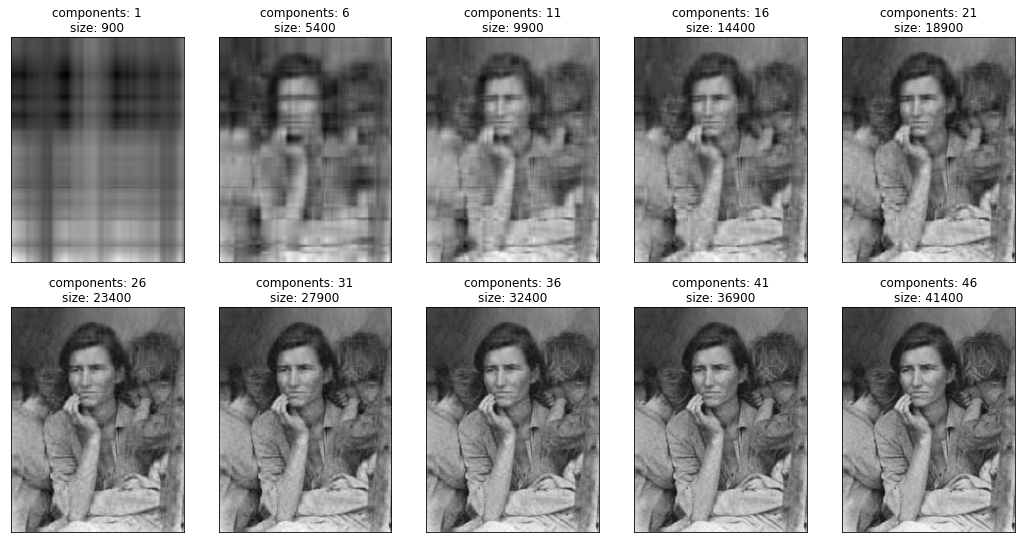

In [14]:
plt.figure(figsize=(2 * 1.8 * 5, 2 * 2.4 * 5))
for n_components in range(1, 51, 5):
    pca = PCA(n_components=n_components).fit(image_array)
    image_pca = pca.transform(image_array)
    plt.subplot(5, 5, 1 + n_components // 5)
    plt.imshow(pca.inverse_transform(image_pca), cmap=plt.cm.gray)
    title = 'components: %s\nsize: %s' % (n_components, image_pca.size)
    plt.title(title, size=12)
    plt.xticks(())
    plt.yticks(())

Above we can see the different variations of the components

Note: 
    
The more components we have = the more detals = more dimensions